In [2]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Non-parametric independent samples test

The effectiveness of advertising for two products (Brand X and Brand Y) was compared. Market research at a local shopping centre was carried out, with the participants being shown an advertizment for two brands of coffee, which they then rated on the overall likelihood of them buying the product (out of 10, with 10 being "definitely going to buy the product"). Half of the participants gave ratings for one of the products, the other half gave ratings for the other product. The data are a follows:

In [3]:
BrandX=pd.Series([8,7,6,2,5,8,7,3])
BrandY=pd.Series([9,9,7,8,10,8,6])

This data is ordinal and we are unceratin about the use of a parametric test of mean, so decide to use a Mann Whitney U test to test if the distribution are the same in the population.

Is there statistical evidence of a difference in ratings between the Brands?  

TypeError: object of type 'NoneType' has no len()

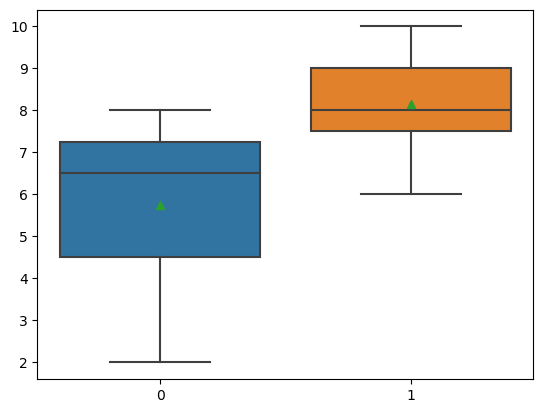

In [4]:
# explore the data
sns.boxplot(data=[BrandX,BrandY],showmeans=True)
sns.swarmplot(data=[BrandX,BrandY])

In [ ]:
stats.mannwhitneyu(BrandX,BrandY,use_continuity=False,method='auto')

Set up the hypothesis:  \
H0:  the distributions of the populatoins from which the samples were drawn are equal.  In general, we can state that this is showing a difference in the medians of the smaples. \
HA: the distributions are not equal.

alpha=0.05

First, sort then rank all of the sample together.  For ties, assign a rank equal to the midpoint of the unadjusted rankings.

In [5]:
Ranks=pd.DataFrame([[8,7,6,2,5,8,7,3],[9,9,7,8,10,9,6]])
Rankssorted=pd.DataFrame([[2,3,5,6,7,7,8,8],[6,7,8,8,9,9,10]])
Rankssorted

,0,1,2,3,4,5,6,7
0,2,3,5,6,7,7,8,8.0
1,6,7,8,8,9,9,10,NaN


In [6]:
Ranksranked=pd.DataFrame([[1,2,3,4.5,7,7,10.5,10.5],[4.5,7,10.5,10.5,13.5,13.5,15]])
Ranksranked

,0,1,2,3,4,5,6,7
0,1.0,2,3.0,4.5,7.0,7.0,10.5,10.5
1,4.5,7,10.5,10.5,13.5,13.5,15.0,NaN


sum the ranks:  BrandX = 45.5; BrandY=74.5

Calculate the test statistic U: \
U1 = n1n2 +0.5n1(n1 +1)−R1 \
U2= n1n2 +0.5n2 (n2 +1)− R2

In [7]:
U1=8*7+0.5*8*(9)-45.5
U2=8*7+0.5*7*(8)-74.5
print(U1)
print(U2)

46.5
9.5


Use the smaller U value to compare with the critical U value at n1=8 and n2=7 at two-sided significance level=0.05.  Critical U=10. \
We reject the null hypothesis because 9.5<=10. To be significant, the test statistic U has to be equal to or less than the critical value.  We have shown that the populations of scores are not equal between the groups. 

# Non-parametric tests of paired samples:  Signed Rank Test 

H0:  The difference between pairs follows a symmetric distribution about 0; have the same distribution; medians are the same \
HA:  The differene between pairs does not follow a symetric distribution around 0

We fail to reject the null hypothesis and stats that there is not enough evidnece to state that there is a differnce in the dsitributions.  

In [8]:
BeforeTx=pd.Series([85,70,40,65,80,75,55,20])
AfterTx=pd.Series([75,50,50,40,20,65,40,25])

stats.wilcoxon(BeforeTx,AfterTx,alternative='two-sided')

WilcoxonResult(statistic=4.0, pvalue=0.0546875)

Order the paired differences, ignoring the sign of the difference \
Rank the paired differences and give them their sign \
Sum the signed ranks, and show the absolute value \
Smaller of these signed ranks is your test statitsic \
Lookup the T value in a Wicoxon signed rank table adn compare with test statistic \
If the test statistic is less than the T value, then reject the null hypothesis. 

In [9]:
Diff_Tx=(BeforeTx-AfterTx)
Diff_Tx

0    10
1    20
2   -10
3    25
4    60
5    10
6    15
7    -5
dtype: int64

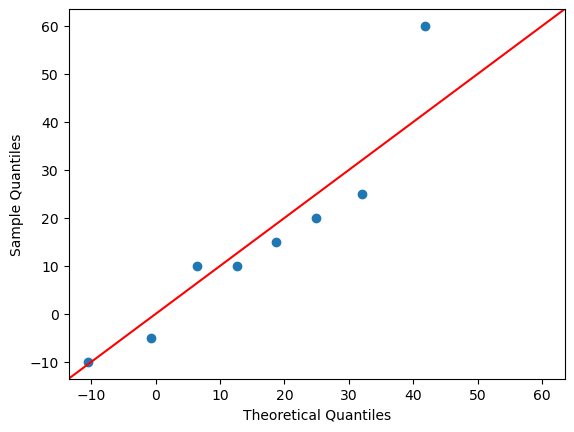

In [10]:
Diff_Tx.sort_values()
sm.qqplot(Diff_Tx,line='45',loc=np.mean(Diff_Tx),scale=np.std(Diff_Tx,ddof=1))
plt.show()

In [11]:
stats.shapiro(Diff_Tx)

ShapiroResult(statistic=0.90093994140625, pvalue=0.29463252425193787)

In [12]:
Ordered_Diff=(-5,-10,10,10,15,20,25,60)
Ranked_Diff_with_Signs=(-1,-3,3,3,5,6,7,8)
Sum_Ranks_Neg= 4
Sum_Rnaks_Pos=32

Signed_ranks=4 \
The T value in the table is 3 at dof=8 and alpha = 0.05.  Since 4 is not less than 3, we cannot reject the null hypotheiss and state that the distributions have not been shown to be significantly different.  

In [13]:
# if you accepted that the differences were normally distributed
scipy.stats.ttest_1samp(Ordered_Diff,0,alternative='two-sided')

Ttest_1sampResult(statistic=2.059964309956102, pvalue=0.07836922393445278)